## Plot From Data From Cris

In [33]:
import csv

def getData(file):
    hist_id = []
    ratio = []
    with open(file) as csvfile:
        csvReader = csv.reader(csvfile)
        for row in csvReader:
            if len(row)==2:
                histo_num = row[0].split("Content(")
                if len(histo_num) == 2:
                    hist_id.append(int(histo_num[1]))
                    zvals = float(row[1].split(")")[0])
                    ratio.append(zvals)
                    
    return np.array(hist_id), np.array(ratio)

In [97]:
id_, ratio = getData("processed_data/cris_lead_brick_no_gap_20bins.csv")

len(id_), len(ratio)

(400, 400)

In [98]:
ratio[20]

0.942081

In [99]:
mc_rat = np.reshape(ratio, (20, 20))
print(mc_rat[1][0])

0.942081


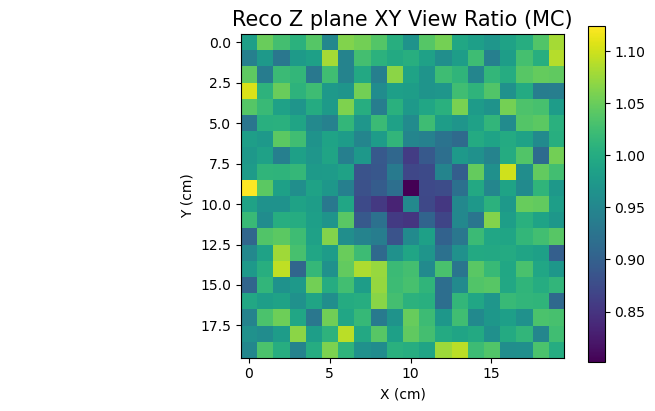

In [100]:
import numpy as np
import matplotlib.pyplot as plt

H = mc_rat
xlabels = np.linspace(-30,30,20)

fig = plt.figure(figsize=(10, 4.2))



ax = fig.add_subplot(111)
plt.imshow(H)
ax.set_title("Reco Z plane XY View Ratio (MC)",fontsize=15)
#ax.set_aspect('equal')
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
#ax.set_xticks(xlabels)


cax = fig.add_axes([0.12, 0.1, 0.68, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

# Lead Brick with Gap Experiment

1.3 Million calibration events recorded

0.7 Million lead brick events recorded so far (03/01/20).


In [1]:
mu = 62
std = 142
x = mu - 3*std
y = mu + 3*std
x, y

(-364, 488)

## Creating Cumulative MDFO for Lead Brick Runs

In [1]:
from MuDataFrame import *
import copy

r1,r2 = 448, 464
path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/lead_brick_with_gap/run{}.csv"
lead_files = [path.format(i) for i in range(r1,r2+1)]

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

mdfo_lead.longDataMode()

mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,speed,Run_Num,xx,yy
0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,55.212795,59.457348,-85.943669,-38.197186,13.002545,NaN,0.706080,448,-14.062078,-18.864596
1,1,1,450312,0,1.0,1.0,1.0,0.0,1.0,1.0,...,-253.738452,-12.937757,NaN,NaN,NaN,NaN,NaN,448,-9.150742,NaN
2,2,2,740249,0,1.0,1.0,1.0,1.0,1.0,1.0,...,-122.078208,-26.891010,-1.583861,-2072.660917,7.348492,NaN,1.233197,448,8.916087,-23.489104
3,3,3,850352,0,1.0,1.0,1.0,1.0,1.0,1.0,...,-74.982296,-43.781086,30.954186,106.053714,15.489461,NaN,0.278597,448,-24.147078,25.053860
4,4,4,1480709,0,1.0,1.0,1.0,1.0,1.0,1.0,...,54.099581,60.680809,110.912014,29.598294,2.921821,NaN,0.612330,448,14.399327,12.160158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699995,99995,1699995,550961719311,0,1.0,1.0,0.0,0.0,1.0,1.0,...,27.995865,117.260401,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN
1699996,99996,1699996,550962269390,0,1.0,1.0,0.0,0.0,1.0,1.0,...,-59.202036,-55.450903,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN
1699997,99997,1699997,550962659368,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN
1699998,99998,1699998,550962849405,0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,22.384373,146.656170,NaN,NaN,NaN,464,16.335325,NaN


In [18]:
def getXatZPlane_diffTDC(x1, x2, zplane, dsep):
    x = (zplane / dsep) * (
        getPhysicalUnitsFromDiffTDC(x1) -
        getPhysicalUnitsFromDiffTDC(x2)) + getPhysicalUnitsFromDiffTDC(x1)
    return x

def getPhysicalUnitsFromDiffTDC(tdc):
    return (55 / 130) * tdc

mdfo_lead.reload()

xx_lead = getXatZPlane_diffTDC(mdfo_lead.get("diffL1"), mdfo_lead.get("diffL3"), 42,165)
yy_lead = getXatZPlane_diffTDC(mdfo_lead.get("diffL2"), mdfo_lead.get("diffL4"), 42,165)

mdfo_lead.events_df["xx1"] = xx_lead
mdfo_lead.events_df["yy1"] = yy_lead

In [20]:
getEmissionOutputCSV(mdfo_lead,"processed_data/lead_bricks_with_gap.csv")

## MDFO Lead Bricks With Space

In [3]:
from MuDataFrame import *

mdfo_lead = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/working_files_2021/lead_bricks_with_gap.csv")

mdf_lead = mdfo_lead.events_df

mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,Unnamed: 0,Unnamed: 0.1,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,...,theta_x2,theta_y2,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1
0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,...,-85.943669,-38.197186,13.002545,NaN,0.706080,448,-14.062078,-18.864596,-15.761538,-23.861538
1,1,1,1,1,450312,0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,448,-9.150742,NaN,-14.107692,NaN
2,2,2,2,2,740249,0,1.0,1.0,1.0,1.0,...,-1.583861,-2072.660917,7.348492,NaN,1.233197,448,8.916087,-23.489104,9.392308,-26.961538
3,3,3,3,3,850352,0,1.0,1.0,1.0,1.0,...,30.954186,106.053714,15.489461,NaN,0.278597,448,-24.147078,25.053860,-32.153846,28.500000
4,4,4,4,4,1480709,0,1.0,1.0,1.0,1.0,...,110.912014,29.598294,2.921821,NaN,0.612330,448,14.399327,12.160158,16.415385,13.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699995,1699995,1699995,99995,1699995,550961719311,0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN
1699996,1699996,1699996,99996,1699996,550962269390,0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN
1699997,1699997,1699997,99997,1699997,550962659368,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN
1699998,1699998,1699998,99998,1699998,550962849405,0,1.0,0.0,1.0,1.0,...,22.384373,146.656170,NaN,NaN,NaN,464,16.335325,NaN,15.084615,NaN


In [6]:
time = mdfo_lead.get("event_time")[-1]*0.00000000001157407
1.7 / time

0.2665877911708961

## Creating Cumulative MDFO using Calibration Data Runs

In [4]:
plt.rcParams['figure.figsize'] = [8, 6]

In [5]:
mdfo_calib = MuDataFrame("processed_data/calibration_data.csv")

mdf_calib = mdfo_calib.events_df

mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,...,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy,speed,index,xx1,yy1
0,0,0,0.0,0,0,0,1.0,1.0,1.0,1.0,...,-75.200711,6.371653,NaN,408,8.402778,8.285486,11.076032,NaN,8.330769,7.792308
1,1,1,1.0,1,94137,0,1.0,1.0,1.0,1.0,...,-13.905355,11.086497,NaN,408,-8.389304,29.851975,0.386791,NaN,-8.076923,28.484615
2,2,2,2.0,2,259967,0,1.0,1.0,1.0,1.0,...,136.431052,6.613531,NaN,408,-4.230215,-16.106861,0.277034,NaN,-6.169231,-16.838462
3,3,3,3.0,3,540068,0,1.0,1.0,1.0,1.0,...,136.369656,11.331981,NaN,408,-29.130160,-7.886501,0.449059,NaN,-30.076923,-7.976923
4,4,4,4.0,4,650077,0,1.0,1.0,1.0,1.0,...,-138.183939,15.394396,NaN,408,12.760181,-29.695749,0.223868,NaN,12.830769,-30.823077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,1999995,NaN,1999995,630008348673,0,1.0,1.0,1.0,1.0,...,-41.380285,13.218939,NaN,445,28.791795,-2.510153,0.201915,99995.0,35.707692,-4.407692
1999996,1999996,1999996,NaN,1999996,630008608684,0,1.0,1.0,1.0,1.0,...,125.123871,8.974938,NaN,445,13.189311,-10.555556,0.271806,99996.0,16.615385,-11.546154
1999997,1999997,1999997,NaN,1999997,630009188778,0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,445,7.572244,NaN,NaN,99997.0,10.684615,NaN
1999998,1999998,1999998,NaN,1999998,630009558770,0,1.0,1.0,1.0,1.0,...,67.544962,NaN,NaN,445,NaN,-23.824668,NaN,99998.0,NaN,-29.246154


# X View Y View

## Using Asymmetry Coordinates

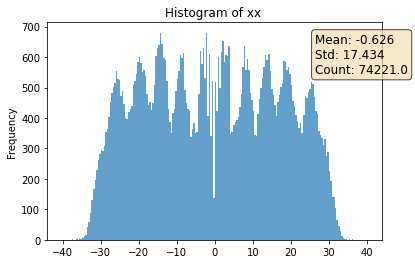

In [71]:
mdfo_lead.getHistogram("xx",range=(-40,40))

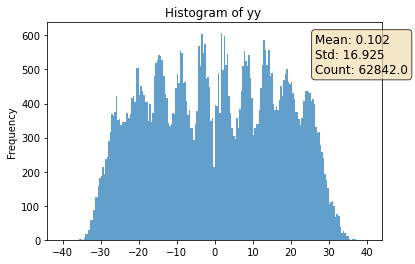

In [72]:
mdfo_lead.getHistogram("yy",range=(-40,40))

## Using DiffTDC Coordinates

In [10]:
def getXatZPlane_diffTDC(x1, x2, zplane, dsep):
    x = (zplane / dsep) * (
        getPhysicalUnitsFromDiffTDC(x1) -
        getPhysicalUnitsFromDiffTDC(x2)) + getPhysicalUnitsFromDiffTDC(x1)
    return x

def getPhysicalUnitsFromDiffTDC(tdc):
    return (55 / 130) * tdc

mdfo_calib.reload()
mdfo_lead.reload()

xx_lead = getXatZPlane_diffTDC(mdfo_lead.get("diffL1"), mdfo_lead.get("diffL3"), 42,
                       165)
yy_lead = getXatZPlane_diffTDC(mdfo_lead.get("diffL2"), mdfo_lead.get("diffL4"), 42,
                       165)
xx_calib = getXatZPlane_diffTDC(mdfo_calib.get("diffL1"), mdfo_calib.get("diffL3"), 42,
                        165)
yy_calib = getXatZPlane_diffTDC(mdfo_calib.get("diffL2"), mdfo_calib.get("diffL4"), 42,
                        165)

mdfo_lead.events_df["xx1"] = xx_lead
mdfo_lead.events_df["yy1"] = yy_lead

mdfo_calib.events_df["xx1"] = xx_calib
mdfo_calib.events_df["yy1"] = yy_calib

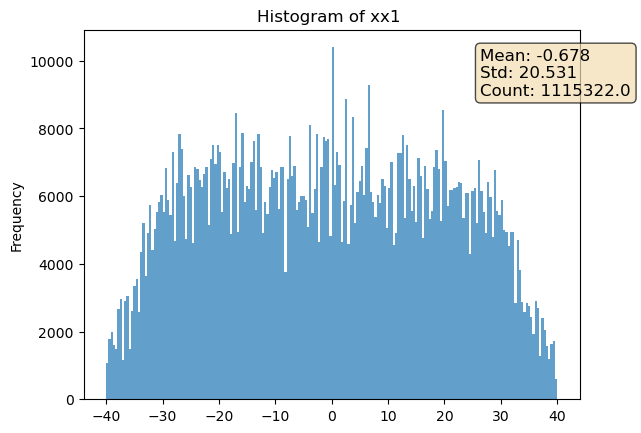

In [8]:
mdfo_lead.getHistogram("xx1",range=(-40,40))

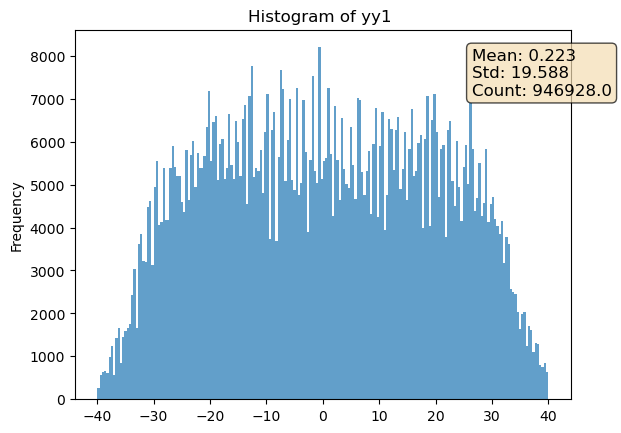

In [9]:
mdfo_lead.getHistogram("yy1",range=(-40,40))

# Generating Tomograms

In [10]:
from TomoFunctions import *

In [7]:
import copy

def getSameShapeDataSets(mdfo1, mdfo2):
    mdfo1 =  copy.copy(mdfo1)
    mdfo2 = copy.copy(mdfo2)
    s1 = len(mdfo1.events_df.index)
    s2 = len(mdfo2.events_df.index)
    s = min(s1,s2)
    mdfo1.events_df =  mdfo1.events_df.iloc[:s]
    mdfo2.events_df =  mdfo2.events_df.iloc[:s]
    return mdfo1, mdfo2

def getSameSizeData(mdfo1, mdfo2, data_term):
    mdfo1, mdfo2 = getSameShapeDataSets(mdfo1, mdfo2)
    return mdfo1.get(data_term), mdfo2.get(data_term)

def getRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    h = h1 / h2
    h[h >= 1.15] = 1.15
    h[h <= 0.7] = 0.7
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()

## All Data

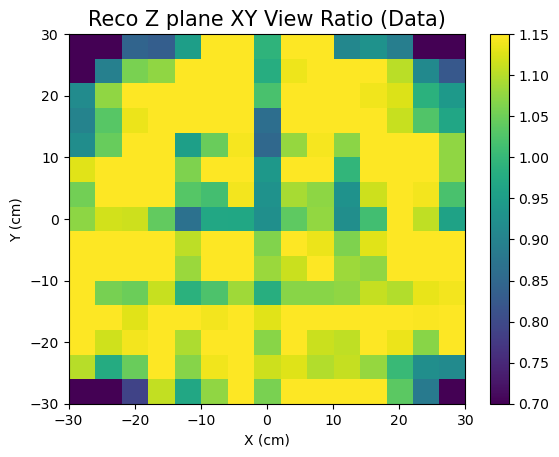

In [84]:
mdfo_lead.reload()
mdfo_calib.reload()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

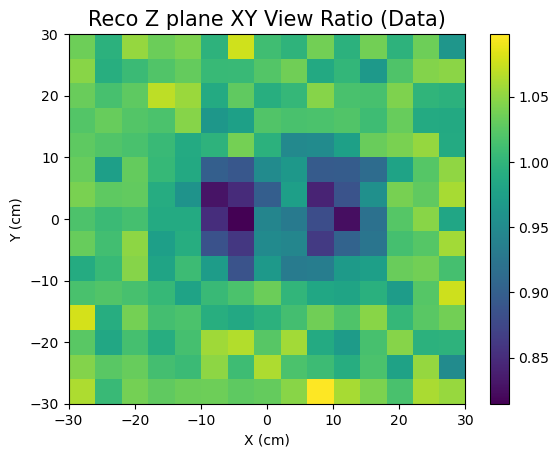

In [85]:
mdfo_lead.reload()
mdfo_calib.reload()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

## All Layers Hit Events

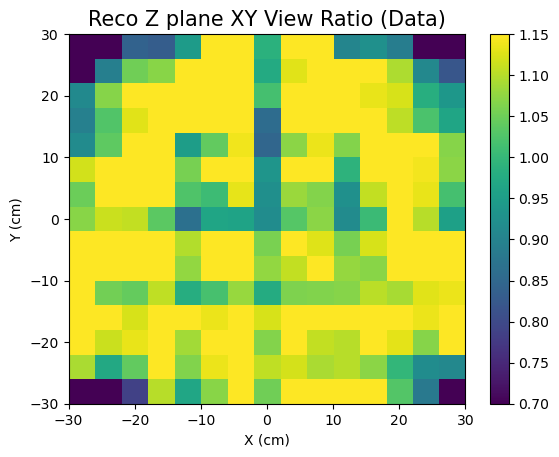

In [86]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

Bins = 11

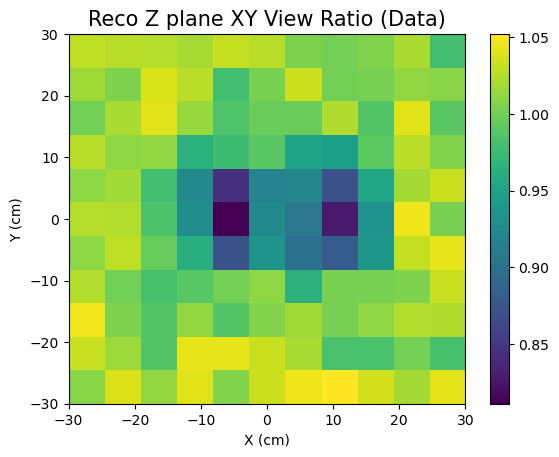

In [5]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(11,11))

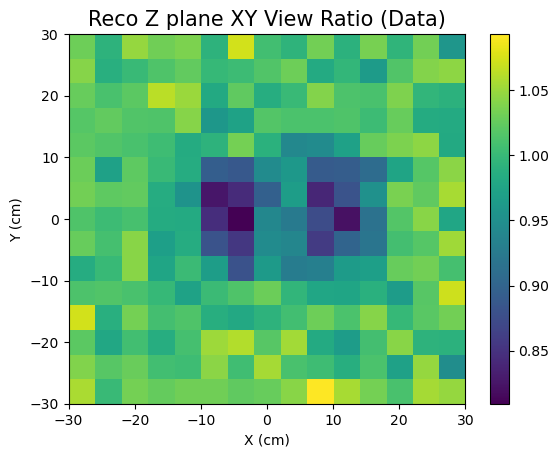

In [6]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

Higher binning

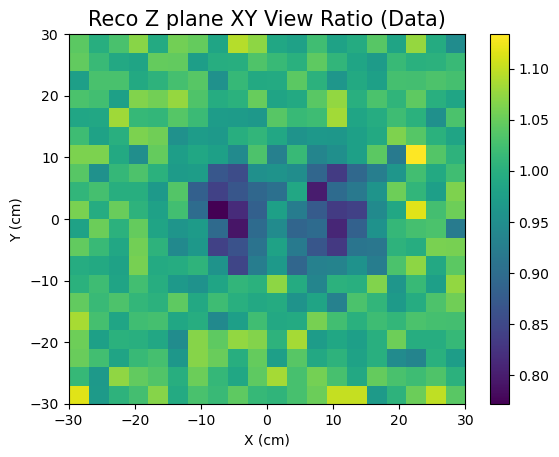

In [7]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(20,20))

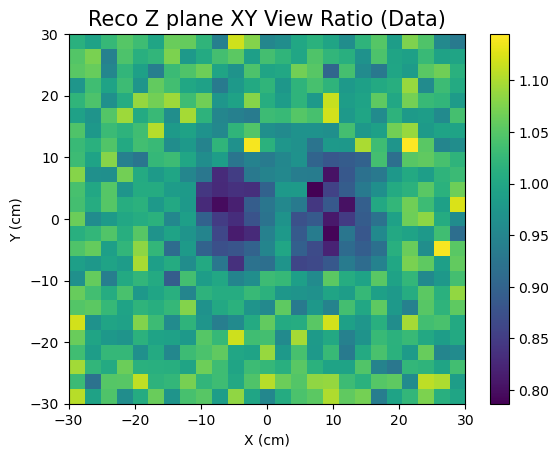

In [8]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(25,25))

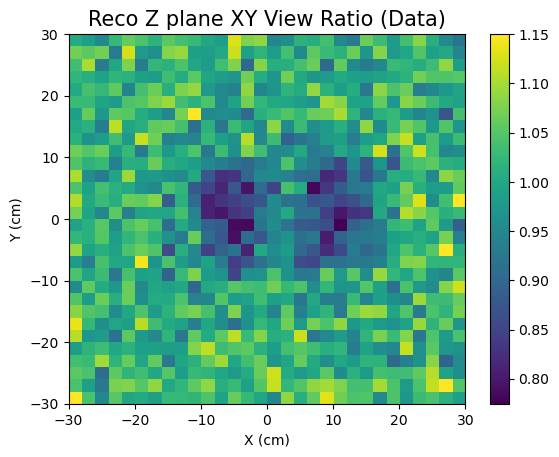

In [9]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(30,30))

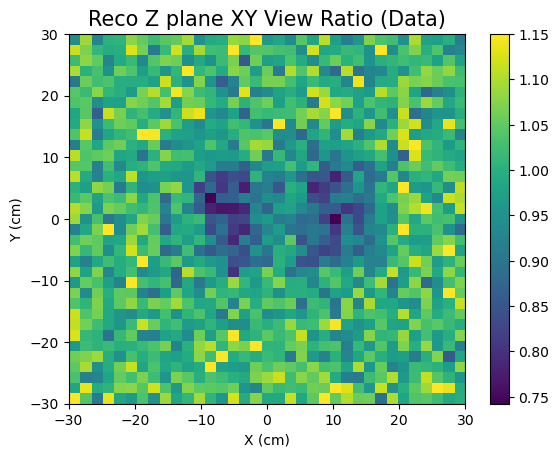

In [10]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(35,35))

## Restricted Muon Angles

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("z_angle", 5, ">=")
mdfo_lead.keepEvents("z_angle", 10, "<=")


mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("z_angle", 5, ">=")
mdfo_calib.keepEvents("z_angle", 10, "<=")



xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("z_angle", 5, ">=")
mdfo_lead.keepEvents("z_angle", 10, "<=")


mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("z_angle", 5, ">=")
mdfo_calib.keepEvents("z_angle", 10, "<=")



xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

## Higher Sum TDC events

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",220,">=")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",220,">=")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",220,">=")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",220,">=")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

## Muons with Sensible Speeds

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("speed",1,"<")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("speed",1,"<")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

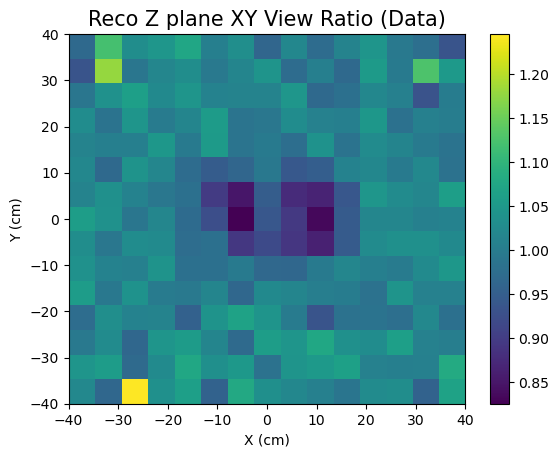

In [31]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("speed",1,"<=")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("speed",1,"<=")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(15,15))

## Slower Muon Events

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("speed",0.6,"<=")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("speed",0.6,"<=")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib])

In [ ]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("speed",0.6,"<=")

mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("speed",0.6,"<=")


xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

getRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib])

# New Tomogram Generation

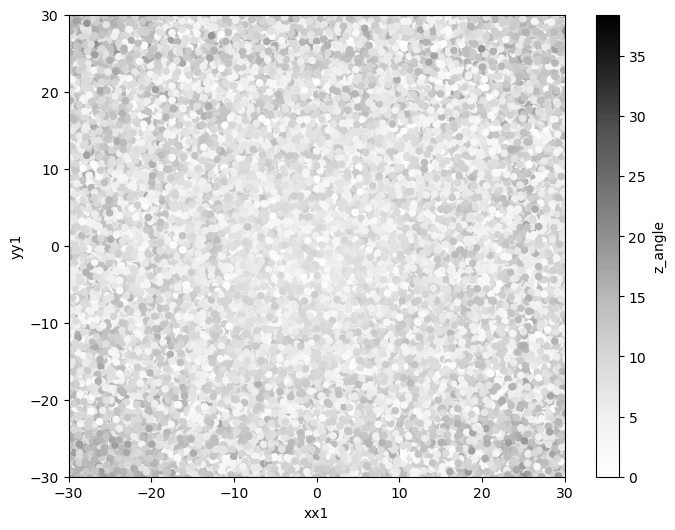

In [13]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, xx_calib = getSameSizeData(mdfo_lead, mdfo_calib, "xx1")
yy_lead, yy_calib = getSameSizeData(mdfo_lead, mdfo_calib, "yy1")

mdf_lead.plot.scatter(x="xx1",y="yy1",c="z_angle")
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()